# <center>Import Libraries</center>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

import chart_studio.plotly as py 
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objects as go
import plotly.express as px

init_notebook_mode(connected=True) 

import os
#print(os.listdir("../USER"))

# warnings library
import warnings        
# ignore filters
warnings.filterwarnings("ignore")


# <center>Extracting dataset from Kaggle</center>

In [4]:
os.system("kaggle datasets download -d davidcariboo/player-scores > /dev/null 2>&1")
#!kaggle datasets download -d davidcariboo/player-scores --force

import zipfile
with zipfile.ZipFile("player-scores.zip","r") as zip_ref:
    zip_ref.extractall("Football_transfer_market_dataset")


In [5]:
appearance=pd.read_csv("Football_transfer_market_dataset/appearances.csv",parse_dates=['date'])
appearance=appearance[(appearance['date']>= '2022-01') & (appearance['date']<= '2025-01')]

In [6]:
appearance_filtered = appearance[['game_id']]
club_games=pd.read_csv("Football_transfer_market_dataset/club_games.csv")
club_games=pd.merge(appearance_filtered,club_games,on='game_id',how='left')

In [7]:
clubs=pd.read_csv("Football_transfer_market_dataset/clubs.csv")
clubs=clubs.drop(columns=['coach_name','total_market_value','filename','url'])

In [8]:
competitions=pd.read_csv("Football_transfer_market_dataset/competitions.csv")
competitions=competitions.drop(columns=['url'])

In [9]:
game_events=pd.read_csv("Football_transfer_market_dataset/game_events.csv",parse_dates=['date'])
game_events=pd.merge(game_events,appearance_filtered,on='game_id',how='right')

In [10]:
game_lineups=pd.read_csv("Football_transfer_market_dataset/game_lineups.csv")
game_lineups=game_lineups[(game_lineups['date']>='2022-01') & (game_lineups['date']<= '2025-01')]

In [11]:
games=pd.read_csv("Football_transfer_market_dataset/games.csv")
games=games[(games['date']>= '2014-01') & (games['date']<= '2025-01')]

In [12]:
player_valuations=pd.read_csv("Football_transfer_market_dataset/player_valuations.csv")
player_valuations=player_valuations[(player_valuations['date']>='2022-01')&(player_valuations['date']<='2025-01')]

In [13]:
players=pd.read_csv("Football_transfer_market_dataset/players.csv")


In [14]:
transfers=pd.read_csv("Football_transfer_market_dataset/transfers.csv")
transfers=transfers[transfers['transfer_date']>= '2022-01']

#                                                          <center>Exploratory Data Analysis</center>

# <center>1.Players with highest goal in major competitions</center>

In [17]:
filter1=pd.merge(appearance,competitions,on='competition_id',how='left')
filter1=filter1[filter1['is_major_national_league']==True]

filter1=(
    filter1.loc[filter1.groupby(['name'])['goals'].idxmax()]
    [['competition_id','name', 'player_name', 'goals','country_name']]
)

for game,player in zip(filter1['name'],filter1['player_name']):
    (print(f"Highest goal player in '{game}' is {player}" ))
    
print()
filter1

Highest goal player in 'bundesliga' is Patrik Schick
Highest goal player in 'laliga' is Yéremy Pino
Highest goal player in 'ligue-1' is Elye Wahi
Highest goal player in 'premier-league' is Gabriel Jesus
Highest goal player in 'serie-a' is Lautaro Martínez



,competition_id,name,player_name,goals,country_name
417252,L1,bundesliga,Patrik Schick,4,Germany
25079,ES1,laliga,Yéremy Pino,4,Spain
190216,FR1,ligue-1,Elye Wahi,4,France
47230,GB1,premier-league,Gabriel Jesus,4,England
234687,IT1,serie-a,Lautaro Martínez,4,Italy


### 2.Clubs spending most on transfer over seasons from 2022 to 2025

# <center>3.Top Players with highest market value and their current club</ceneter>

In [20]:
filter3=pd.merge(player_valuations,transfers,on='player_id',how='inner')
filter3 =filter3.groupby(['transfer_season','player_name'])['market_value_in_eur_y'].agg('mean').reset_index()
filter3 = filter3.sort_values(by=['transfer_season', 'market_value_in_eur_y'], ascending=[True, False])

# Group by season and pick the top 5 players per season
top5_filter3 = filter3.groupby('transfer_season').head(5).reset_index(drop=True)


players_22to23=top5_filter3[top5_filter3['transfer_season']=='22/23']
players_23to24=top5_filter3[top5_filter3['transfer_season']=='23/24']
players_24to25=top5_filter3[top5_filter3['transfer_season']=='24/25']
players_25to26=top5_filter3[top5_filter3['transfer_season']=='25/26']
players_25to26

,transfer_season,player_name,market_value_in_eur_y
23,25/26,Nico González,35000000.0
24,25/26,Manu Koné,26000000.0
25,25/26,Arthur Vermeeren,25000000.0
26,25/26,Mohamed Amoura,22000000.0
27,25/26,Sofyan Amrabat,22000000.0


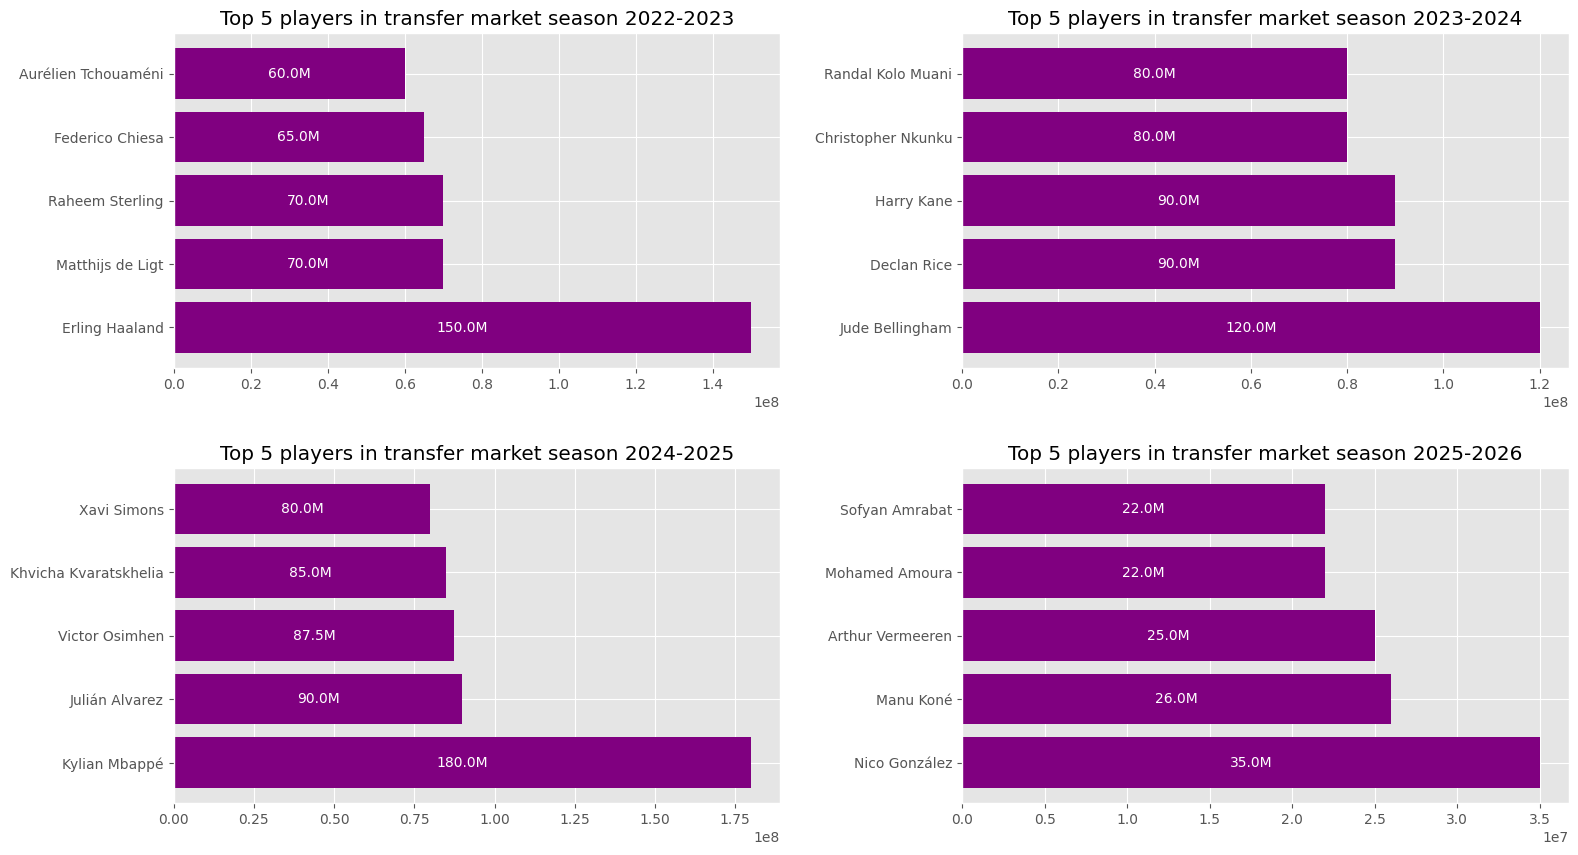

In [21]:
fig,axes = plt.subplots(2 , 2 , figsize=(18,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3) #wspace for width hspace for height

# Function to add normalized bar labels
def add_bar_labels(ax, scale=1_000_000, unit='M'):
    for container in ax.containers:
        # Convert the labels to millions (or any scale)
        labels = [f'{value/scale:.1f}{unit}' for value in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='center', color='white', fontsize=10)

axes[0,0].barh(players_22to23['player_name'],players_22to23['market_value_in_eur_y'],color='purple')
axes[0,0].set_title('Top 5 players in transfer market season 2022-2023') 
add_bar_labels(axes[0,0])
axes[0,1].barh(players_23to24['player_name'],players_23to24['market_value_in_eur_y'],color='purple')
axes[0,1].set_title('Top 5 players in transfer market season 2023-2024') 
add_bar_labels(axes[0,1])
axes[1,0].barh(players_24to25['player_name'],players_24to25['market_value_in_eur_y'],color='purple')
axes[1,0].set_title('Top 5 players in transfer market season 2024-2025') 
add_bar_labels(axes[1,0])
axes[1,1].barh(players_25to26['player_name'],players_25to26['market_value_in_eur_y'],color='purple')
axes[1,1].set_title('Top 5 players in transfer market season 2025-2026') 
add_bar_labels(axes[1,1])


# <ceneter>3. transfer market spending trends of clubs having top 5 highest value players</center> 

### Net Transfer Record = [Income from Player Sales] − [Expenditure on Player Purchases]
1. Negative net_transfer value : 
This indicates , A club investing heavily to strengthen its squad by buying expensive players while selling fewer or less valuable players.
2. Positive net_transfer value :
A club focusing on selling high-value players while spending less on purchases.

### Insights
##### A club with a consistently negative net transfer record may indicate:

1. Ambitious goals, like trying to win titles or improve performance.
2. Financial backing from wealthy owners who are willing to invest heavily.
3. Short-term strategy to build a competitive squad, often seen in top-tier clubs.
  
##### On the other hand, positive or balanced records suggest:
1. Financial prudence or restrictions.
2. A focus on generating revenue through player sales, often seen in smaller or mid-tier clubs.

In [25]:
#to normalize net_transfer columnin clubs
def normalize_transfer_record(value):
    value = value.replace('€', '').replace('+', '').replace(',', '').strip()  # Remove non-numeric characters
    if 'm' in value:
        return float(value.replace('m', '')) * 1e6  # to convert 'm' to millions
    elif 'k' in value:
        return float(value.replace('k', '')) * 1e3  # to convert 'k' to thousands
    elif value == '':
        return 0  # Handle empty values
    else:
        return float(value)  # Convert plain numbers

clubs['net_transfer_record']=clubs['net_transfer_record'].apply(normalize_transfer_record)

filter2= pd.merge(transfers,players_22to23,on=['transfer_season','player_name'],how='right')
filter2.groupby(['player_name']).agg(market_value_in_eur=('market_value_in_eur','mean')).reset_index()

top5_club=filter2.sort_values(by='market_value_in_eur',ascending=False).head(5)[['to_club_name','to_club_id']]
top5_club_df = top5_club.rename(columns={'to_club_id': 'club_id'})
top5_club=pd.merge(top5_club_df,clubs,on='club_id',how='left')
print(top5_club[['name','net_transfer_record']])

fig=px.bar(top5_club,
            x='net_transfer_record',
           y='name',
           color='net_transfer_record',
           color_continuous_scale='reds',
           title='Clubs spending on top value player in transfer market' ,
           text='net_transfer_record',
           orientation='h'
          )
fig.update_layout(height=300,
                  width=1000,
                 xaxis=dict(title="Net Transfer Record (€)"
                           ),
                  
    yaxis_title="Club Name"  
                 )
fig.show()



                            name  net_transfer_record
0  Manchester City Football Club           76000000.0
1              FC Bayern München          -67650000.0
2          Chelsea Football Club          -40500000.0
3         Juventus Football Club          -78500000.0
4     Real Madrid Club de Fútbol          -33000000.0


# <cenetr>4.Net Transfer Record by season(2021-2025) of top 5 clubs by their spending on players :</cenetr>

In [27]:
club_sales_df=pd.merge(top5_club,transfers,left_on='club_id',right_on='from_club_id',how='left')
club_purchase_df=pd.merge(top5_club,transfers,left_on='club_id',right_on='to_club_id',how='left')

club_purchase_df=club_purchase_df.groupby(['name','club_id','transfer_season']).agg({'market_value_in_eur':sum})
club_sales_df=club_sales_df.groupby(['name','club_id','transfer_season']).agg({'market_value_in_eur':sum})

filter4=club_sales_df.merge(club_purchase_df,on=['name','club_id','transfer_season'],how='outer')
filter4=filter4.rename(columns={'market_value_in_eur_x':'net_sales','market_value_in_eur_y':'net_purchase'})
filter4.fillna(0,inplace=True)
filter4['net_transfer']=filter4['net_sales']-filter4['net_purchase']
filter4

net_sales  \
name                          club_id transfer_season                
Chelsea Football Club         631     21/22             25000000.0   
                                      22/23            421200000.0   
                                      23/24            447500000.0   
                                      24/25            340700000.0   
FC Bayern München             27      21/22              2800000.0   
                                      22/23            213600000.0   
                                      23/24            200800000.0   
                                      24/25            157000000.0   
                                      25/26                    0.0   
Juventus Football Club        506     21/22            155000000.0   
                                      22/23            291600000.0   
                                      23/24            168000000.0   
                                      24/25            316000000.0   
                                      25/26                    0.0   
Manchester City Football Club 281     21/22             71500000.0   
                                      22/23            287000000.0   
                                      23/24            228000000.0   
                                      24/25            207000000.0   
Real Madrid Club de Fútbol    418     21/22                    0.0   
                                      22/23            106000000.0   
                                      23/24             59000000.0   
                                      24/25             31800000.0   

                                                       net_purchase  \
name                          club_id transfer_season                 
Chelsea Football Club         631     21/22              45200000.0   
                                      22/23             609300000.0   
                                      23/24             549250000.0   
                                      24/25             365700000.0   
FC Bayern München             27      21/22              22750000.0   
                                      22/23             248600000.0   
                                      23/24             313850000.0   
                                      24/25             215650000.0   
                                      25/26              16000000.0   
Juventus Football Club        506     21/22             146000000.0   
                                      22/23             396400000.0   
                                      23/24             185600000.0   
                                      24/25             328950000.0   
                                      25/26              53000000.0   
Manchester City Football Club 281     21/22              91500000.0   
                                      22/23             361000000.0   
                                      23/24             361000000.0   
                                      24/25             161000000.0   
Real Madrid Club de Fútbol    418     21/22              39000000.0   
                                      22/23             140000000.0   
                                      23/24             186300000.0   
                                      24/25             251800000.0   

                                                       net_transfer  
name                          club_id transfer_season                
Chelsea Football Club         631     21/22             -20200000.0  
                                      22/23            -188100000.0  
                                      23/24            -101750000.0  
                                      24/25             -25000000.0  
FC Bayern München             27      21/22             -19950000.0  
                                      22/23             -35000000.0  
                                      23/24            -113050000.0  
                                      24/

In [28]:
filter4.reset_index(inplace=True)

fig = px.line(
    filter4,
    x='transfer_season',
    y='net_transfer',
    color='name',
    title="Net Transfer by Clubs and Seasons",
    labels={'net_transfer': 'Net Transfer (€)', 'transfer_season': 'Transfer Season', 'name': 'Club Name'},
    line_shape='spline',
)

fig.update_layout(
    xaxis=dict(title="Transfer Season", tickangle=-45),
    yaxis=dict(title="Net Transfer (€)"),
    legend_title="Club Name",
    template="plotly_white",
    height=450,
    width=1100
)

fig.show()

# <center>5.to retrieve market_value of all clubs ( Missing column of clubs.csv)</center>

In [217]:

#to keep recent transfers of all unique player_id
recent_transfers = transfers.loc[transfers.groupby('player_id')['transfer_date'].idxmax()]
clubs_market_value=recent_transfers.groupby(['to_club_name','to_club_id','transfer_season'])['market_value_in_eur'].sum().reset_index().sort_values(by='market_value_in_eur',ascending=False)
clubs_market_value.drop(clubs_market_value[clubs_market_value['market_value_in_eur']==0.0].index,inplace=True)

columns_to_merge=clubs[['club_id','name','squad_size','average_age','foreigners_number','foreigners_percentage','national_team_players']]

clubs_market_value=pd.merge(clubs_market_value,columns_to_merge,left_on='to_club_id',right_on='club_id',how='left')


clubs_market_value=clubs_market_value.groupby(['to_club_id','name','transfer_season'])[['market_value_in_eur']].apply(lambda x:x)
clubs_market_value

market_value_in_eur
to_club_id name            transfer_season                          
3          1.FC Köln       21/22           1816              10000.0
                           22/23           340            14700000.0
                           23/24           462             8200000.0
                           24/25           632             4500000.0
4          1.FC Nuremberg  23/24           1050            1000000.0
...                                                              ...
85465      FK Karpaty Lviv 24/25           494             7400000.0
86209      FK Livyi Bereh  23/24           1129             825000.0
                           24/25           931             1550000.0
110302     Avs Futebol SAD 23/24           825             2350000.0
                           24/25           493             7450000.0

[1038 rows x 1 columns]

# <center>Top Spenders in Football Transfer Market (2021-2025)</center>

In [222]:
clubs_market_value.reset_index(inplace=True)
clubs_market_value.loc[clubs_market_value.groupby('transfer_season')['market_value_in_eur'].idxmax()][['transfer_season','name','market_value_in_eur']]


,transfer_season,name,market_value_in_eur
354,21/22,Juventus Football Club,81500000.0
402,22/23,Chelsea Football Club,265000000.0
375,23/24,Paris Saint-Germain Football Club,374500000.0
376,24/25,Paris Saint-Germain Football Club,363500000.0
358,25/26,Juventus Football Club,53000000.0


###  Transfer Fee :-
#### Definition: The actual amount paid by one club to another to acquire a player.
#### Determined By: Negotiations between the selling and buying clubs, often influenced by factors such as:
1. Player's importance to the selling club.
2. Demand for the player.
3. Contract length (players with shorter contracts may be less expensive).
4. Performance, age, and reputation.
5. Financial situations of the involved clubs.

### Market Value :-
#### Definition: An estimated value of a player's worth based on their current ability, potential, and external market factors.
#### Determined By: Independent evaluations from experts, analysts, or platforms (like Transfermarkt), considering:
1. Player's age, form, and statistics.
2. Position and skills.
3. Recent performances and achievements.
4. Trends in the transfer market.

# <center>6.Players with highest negotiation and their nagotiator club (and  estimated market value)</center>

In [34]:
#filter6=transfers.loc[transfers.groupby(['transfer_season'])['transfer_fee'].idxmax()][['transfer_season','player_name','to_club_name','transfer_fee','market_value_in_eur']]
filter6 = transfers[transfers['transfer_fee'] == transfers.groupby('transfer_season')['transfer_fee'].transform('max')].sort_values(by='transfer_season',ascending=True)[['transfer_season', 'player_name', 'to_club_name', 'transfer_fee', 'market_value_in_eur']]
filter6.drop(filter6[filter6['transfer_fee']==0.0].index,inplace=True)
filter6


,transfer_season,player_name,to_club_name,transfer_fee,market_value_in_eur
23864,21/22,Dušan Vlahović,Juventus,83500000.0,70000000.0
15729,22/23,Enzo Fernández,Chelsea,121000000.0,55000000.0
11592,23/24,Declan Rice,Arsenal,116600000.0,90000000.0
855,24/25,Khvicha Kvaratskhelia,Paris SG,75000000.0,85000000.0
2057,24/25,Julián Alvarez,Atlético Madrid,75000000.0,90000000.0
28,25/26,Nico González,Juventus,28100000.0,35000000.0


In [35]:
fig=px.bar(filter6,
           x='player_name',
           y='transfer_fee',
           color='transfer_fee',
           color_continuous_scale='greens',
           )
fig.add_trace(
    go.Scatter(
        x=filter6['player_name'],
        y=filter6['market_value_in_eur'],
        mode='lines+markers',
        name='Market Value',
        line=dict(color='blue'),
    )
)
fig.update_layout(title='Players transferred by highest negotiation by seasons (from 2021 to 2025)',
                 height=450,
                 width=1000,
                  legend=dict(
        x=1.05,  # Shift legend to the right
        y=1.05,     # Align legend at the top
        bgcolor="rgba(255,255,255,0.8)",  # Semi-transparent background
        font=dict(size=10),  # Adjust font size
    ),
                 )

fig.show()

# <center>7.Analysing Winning Probability of playing at home and their outcomes</center>

In [37]:
filter7=pd.merge(clubs,club_games,on='club_id',how='right')

home_winners=filter7[(filter7['hosting']=='Home')& (filter7['is_win']==1)]
home_winners=home_winners.groupby(['name']).size().reset_index()
home_winners.rename(columns={0:'Total_home_wins','name':'club_name'},inplace=True)

home_losers=filter7[(filter7['hosting']=='Home')& (filter7['is_win']==0)]
home_losers=home_losers.groupby(['name']).size().reset_index()
home_losers.rename(columns={0:'Total_home_loss','name':'club_name'},inplace=True)

#the ratio of winning and losing when playing at home town 
from math import gcd

home_adv=pd.merge(home_winners,home_losers,on='club_name',how='outer')
home_adv=home_adv.dropna()
home_adv['ratio_winVSloss']=home_adv.apply(lambda row: f"{int(row['Total_home_wins'])//gcd(int(row['Total_home_wins']),int(row['Total_home_loss']))}"
                                           f":{int(row['Total_home_loss'])//gcd(int(row['Total_home_wins']),int(row['Total_home_loss']))}"
                                          ,axis=1)
home_adv.sort_values(by='ratio_winVSloss',ascending=False,inplace=True)

fig=go.Figure(
    go.Scatter(
            x=home_adv['club_name'],
            y=home_adv['Total_home_wins'],
    mode='lines',
    line=dict(color='green'),
        name='Home Wins',
           )
)

fig.add_trace(
    go.Scatter(
        x=home_adv['club_name'],
        y=home_adv['Total_home_loss'],
        mode='lines',
        line=dict(color='red'),
        name='Home Losses',
    )
)

fig.update_layout(title=dict(text=('Home Winning rate VS Home Losing rate by Clubs<br>'
                 "<sub>This plot illustrates that , clubs performs better in games when playing at home.</sub><br>"
                  "<sub>The number of wins is more than number of losses for many of the clubs in their home games.</sub>"),
                 font=dict(size=18),  
        y=0.95,  # Move title higher
        yanchor="top",
                 ),

    margin=dict(t=100),

)


fig.show()
           
home_adv         

,club_name,Total_home_wins,Total_home_loss,ratio_winVSloss
215,Newcastle United Football Club,1188.0,696.0,99:58
353,"Футбольный клуб ""Локомотив"" Москва",995.0,739.0,995:739
159,Girona Fútbol Club S. A. D.,988.0,599.0,988:599
336,Villarreal Club de Fútbol S.A.D.,980.0,1033.0,980:1033
352,İstanbul Başakşehir Futbol Kulübü,961.0,746.0,961:746
...,...,...,...,...
225,Olympique de Marseille,1031.0,901.0,1031:901
317,UC Sampdoria,202.0,708.0,101:354
338,Vitória Sport Clube,1017.0,668.0,1017:668
269,Royal Antwerp Football Club,1009.0,657.0,1009:657


## Insights
### It is clearly visible , Clubs Winning probability is higher when playing at their home region

# <center>8.Domestic Leagues of 2024 </center>
# (Winners of competitions and analyzing their perfomance and formation): 

#### fst approach 

In [41]:
winners=games[(games['competition_type']=='domestic_league') & (games['season']==2024)]
winners=winners.drop(columns=['url'])

winners=winners.groupby(['competition_id','round'],as_index=False).apply(lambda x:x)
winners.sort_values(by=['date','game_id'],ascending=[True,True],inplace=True)

melted1=winners.melt(id_vars=['game_id','competition_id','round','date'],value_vars=['home_club_name','away_club_name'],var_name='home/away',value_name='competitors')

melted2=winners.melt(id_vars=['game_id','competition_id','round'],value_vars=['home_club_goals','away_club_goals'],value_name='goals')
melted2=pd.concat([melted1,melted2[['goals']]],axis=1)
melted3=winners.melt(id_vars=['game_id','competition_id','round'],value_vars=['home_club_formation','away_club_formation'],value_name='formation')
winners=pd.concat([melted2,melted3[['formation']]],axis=1)
#filter12=filter12.groupby(['game_id','competition_id','round'],as_index=True,group_keys=True).apply(lambda x:x)
#filter12
def assign_status(group):
    max_goals = group['goals'].max()
    min_goals = group['goals'].min()
    

    # Assign "Win," "Loss," or "Draw"
    group['status'] = group['goals'].apply(
        lambda x: "Draw" if max_goals == min_goals else ("Win" if x == max_goals else "Loss")
    
    )
    return group

# Apply status assignment
winners = winners.groupby(['game_id', 'competition_id', 'round']).apply(assign_status)
winners.reset_index(drop=True, inplace=True)

#create a status column showing 'won''lost' or 'draw' 
#create a points column give 3 points for win , 0 points for loss and 1 for draw
winners["pts"]=np.where(
    winners["status"]=='Draw',
    1,
    np.where(winners["status"]=='Win',
             3,
             0)
)


winners=winners.groupby(['competition_id','competitors']).agg({'home/away':'first',
                                                       'goals':sum,
                                                       'pts':sum,
                                                       "formation": lambda x:list(x.unique())}).apply(lambda x:x).reset_index()
winners=winners.loc[winners.groupby('competition_id')['pts'].idxmax()]
winners=pd.merge(winners,competitions,on='competition_id',how='left')[['competition_id','competition_code', 'competitors', 'home/away', 'goals', 'pts', 'formation','country_name']]
winners.rename(columns={'competitors':'winners'},inplace=True)   
winners
                                                      
                                                      


,competition_id,competition_code,winners,home/away,goals,pts,formation,country_name
0,BE1,jupiler-pro-league,Koninklijke Racing Club Genk,home_club_name,40.0,42,"[3-4-3, 4-2-3-1, 4-3-3 Defending, 3-4-2-1]",Belgium
1,DK1,superligaen,Fodbold Club Midtjylland,away_club_name,31.0,33,"[4-4-2, 4-4-2 double 6, 4-2-3-1, 3-5-2 flat]",Denmark
2,ES1,laliga,Club Atlético de Madrid S.A.D.,away_club_name,33.0,41,"[3-4-2-1, 3-5-2 flat, 5-3-2, 4-4-2, 4-4-2 Diam...",Spain
3,FR1,ligue-1,Paris Saint-Germain Football Club,away_club_name,44.0,40,"[4-3-3 Attacking, 4-2-3-1]",France
4,GB1,premier-league,Liverpool Football Club,away_club_name,45.0,45,"[4-3-3 Attacking, 4-2-3-1]",England
5,GR1,super-league-1,Olympiakos Syndesmos Filathlon Peiraios,home_club_name,28.0,34,[4-2-3-1],Greece
6,IT1,serie-a,Atalanta Bergamasca Calcio S.p.a.,away_club_name,43.0,41,"[3-4-1-2, 3-4-2-1, 3-5-2 flat]",Italy
7,L1,bundesliga,FC Bayern München,away_club_name,47.0,36,"[4-2-3-1, 3-4-2-1]",Germany
8,NL1,eredivisie,Eindhovense Voetbalvereniging Philips Sport Ve...,away_club_name,59.0,45,"[4-3-3 Attacking, 4-3-3 Defending]",Netherlands
9,PO1,liga-portugal-bwin,Futebol Clube do Porto,home_club_name,40.0,40,"[4-2-3-1, 4-3-3 Attacking]",Portugal


#### 2nd approach

In [144]:
filter8=games[(games['competition_type']=='domestic_league') & (games['season']==2024)]
filter8=filter8.drop(columns=['url'])

filter8["winner_club"] = np.where(
    filter8["home_club_goals"] > filter8["away_club_goals"],
    filter8["home_club_name"],
    np.where(
        filter8["home_club_goals"] < filter8["away_club_goals"],
        filter8["away_club_name"],
        "Draw"
    )
)

filter8["winner_club_id"]=np.where(
    filter8["home_club_goals"] > filter8["away_club_goals"],
    filter8["home_club_id"],
    np.where(
        filter8["home_club_goals"] < filter8["away_club_goals"],
        filter8["away_club_id"],
        "Draw"
    )
)

filter8['winner_club_goals']=np.where(
    filter8["home_club_goals"] > filter8["away_club_goals"],
    filter8["home_club_goals"],
    np.where(
        filter8["home_club_goals"] < filter8["away_club_goals"],
        filter8["away_club_goals"],
        "Draw"
    )
)

filter8["winner_club_formation"]=np.where(
    filter8["home_club_goals"] > filter8["away_club_goals"],
    filter8["home_club_formation"],
    np.where(
        filter8["home_club_goals"] < filter8["away_club_goals"],
        filter8["away_club_formation"],
        "Draw"
    )
)

filter8["winner_club_manager"]=np.where(
    filter8["home_club_goals"] > filter8["away_club_goals"],
    filter8["home_club_manager_name"],
    np.where(
        filter8["home_club_goals"] < filter8["away_club_goals"],
        filter8["away_club_manager_name"],
        "Draw"
    )
)

filter8['winner_club_goals']=pd.to_numeric(filter8['winner_club_goals'],errors="coerce")

filter8=filter8[filter8['winner_club']!='Draw'].groupby(["competition_id","winner_club",'winner_club_id']).agg({'winner_club_goals':'sum',
                                                                                               'winner_club_manager':'first',
                                                                                               "winner_club_formation": lambda x:list(x.unique())}
                                                                                             ) 
filter8=filter8.loc[filter8.groupby('competition_id')['winner_club_goals'].idxmax()].reset_index()

filter8=pd.merge(filter8,competitions,on='competition_id',how='left')[['competition_id','competition_code','winner_club_id','winner_club','winner_club_goals','winner_club_manager','winner_club_formation','country_name','is_major_national_league']].sort_values(by='winner_club_goals',ascending=False)
filter8[['competition_code','winner_club','winner_club_goals','winner_club_manager','winner_club_formation']]


,competition_code,winner_club,winner_club_goals,winner_club_manager,winner_club_formation
8,eredivisie,Eindhovense Voetbalvereniging Philips Sport Ve...,57.0,Peter Bosz,"[4-3-3 Attacking, 4-3-3 Defending]"
11,scottish-premiership,The Celtic Football Club,50.0,Brendan Rodgers,[4-3-3 Attacking]
2,laliga,Futbol Club Barcelona,43.0,Hansi Flick,"[4-2-3-1, 4-3-3 Attacking]"
9,liga-portugal-bwin,Sporting Clube de Portugal,43.0,Ruben Amorim,"[3-4-3, 4-4-2 double 6]"
12,super-lig,Galatasaray Spor Kulübü,42.0,Okan Buruk,"[4-2-3-1, 3-4-1-2, 4-4-2 double 6]"
3,ligue-1,Paris Saint-Germain Football Club,41.0,Luis Enrique,"[4-3-3 Attacking, 4-2-3-1]"
7,bundesliga,FC Bayern München,41.0,Vincent Kompany,"[4-2-3-1, 3-4-2-1]"
4,premier-league,Liverpool Football Club,38.0,Arne Slot,"[4-2-3-1, 4-3-3 Attacking]"
6,serie-a,Atalanta Bergamasca Calcio S.p.a.,38.0,Gian Piero Gasperini,"[3-4-2-1, 3-4-1-2]"
13,premier-liga,FC Shakhtar Donetsk,35.0,Marino Pusic,"[4-3-3 Attacking, 4-1-4-1]"


# <center>9.Major International Leagues of 2024:</center> 


In [45]:
filter8[filter8['is_major_national_league']==True][['competition_id','competition_code','winner_club','winner_club_goals','winner_club_manager','winner_club_formation','country_name']]

,competition_id,competition_code,winner_club,winner_club_goals,winner_club_manager,winner_club_formation,country_name
2,ES1,laliga,Futbol Club Barcelona,43.0,Hansi Flick,"[4-2-3-1, 4-3-3 Attacking]",Spain
3,FR1,ligue-1,Paris Saint-Germain Football Club,41.0,Luis Enrique,"[4-3-3 Attacking, 4-2-3-1]",France
7,L1,bundesliga,FC Bayern München,41.0,Vincent Kompany,"[4-2-3-1, 3-4-2-1]",Germany
4,GB1,premier-league,Liverpool Football Club,38.0,Arne Slot,"[4-2-3-1, 4-3-3 Attacking]",England
6,IT1,serie-a,Atalanta Bergamasca Calcio S.p.a.,38.0,Gian Piero Gasperini,"[3-4-2-1, 3-4-1-2]",Italy


# <center> Clubs Market Value Trend From 2021 to 2025</center> 

In [47]:
club_val=clubs_market_value.reset_index()

In [48]:
club_val=pd.merge(club_val,winners,left_on='name',right_on='winners',how='right')
club_val=club_val.groupby('winners')[['name','competition_code','transfer_season','market_value_in_eur']].apply(lambda x:x).sort_values(by=['name','transfer_season'],ascending=[False,True])

club_val


name  \
winners                                                                                                    
The Celtic Football Club                           40                           The Celtic Football Club   
                                                   41                           The Celtic Football Club   
                                                   42                           The Celtic Football Club   
                                                   43                           The Celtic Football Club   
                                                   44                           The Celtic Football Club   
Paris Saint-Germain Football Club                  11                  Paris Saint-Germain Football Club   
                                                   12                  Paris Saint-Germain Football Club   
                                                   13                  Paris Saint-Germain Football Club   
Olympiakos Syndesmos Filathlon Peiraios            18            Olympiakos Syndesmos Filathlon Peiraios   
                                                   19            Olympiakos Syndesmos Filathlon Peiraios   
                                                   20            Olympiakos Syndesmos Filathlon Peiraios   
Liverpool Football Club                            14                            Liverpool Football Club   
                                                   15                            Liverpool Football Club   
                                                   16                            Liverpool Football Club   
                                                   17                            Liverpool Football Club   
Koninklijke Racing Club Genk                       0                        Koninklijke Racing Club Genk   
                                                   1                        Koninklijke Racing Club Genk   
                                                   2                        Koninklijke Racing Club Genk   
Galatasaray Spor Kulübü                            45                            Galatasaray Spor Kulübü   
                                                   46                            Galatasaray Spor Kulübü   
                                                   47                            Galatasaray Spor Kulübü   
                                                   48                            Galatasaray Spor Kulübü   
Futebol Clube do Porto                             33                             Futebol Clube do Porto   
                                                   34                             Futebol Clube do Porto   
                                                   35                             Futebol Clube do Porto   
                                                   36                             Futebol Clube do Porto   
Futbolniy Klub Dynamo Kyiv                         49                         Futbolniy Klub Dynamo Kyiv   
                                                   50                         Futbolniy Klub Dynamo Kyiv   
                                                   51                         Futbolniy Klub Dynamo Kyiv   
                                                   52                         Futbolniy Klub Dynamo Kyiv   
Fodbold Club Midtjylland                           3                            Fodbold Club Midtjylland   
                                                   4                            Fodbold Club Midtjylland   
                                                   5                            Fodbold Club Midtjylland   
                                                   6                            Fodbold Club Midtjylland   
FC Bayern München                                  25                                  FC Bayern München   
                                                   26                                  FC Bayern München

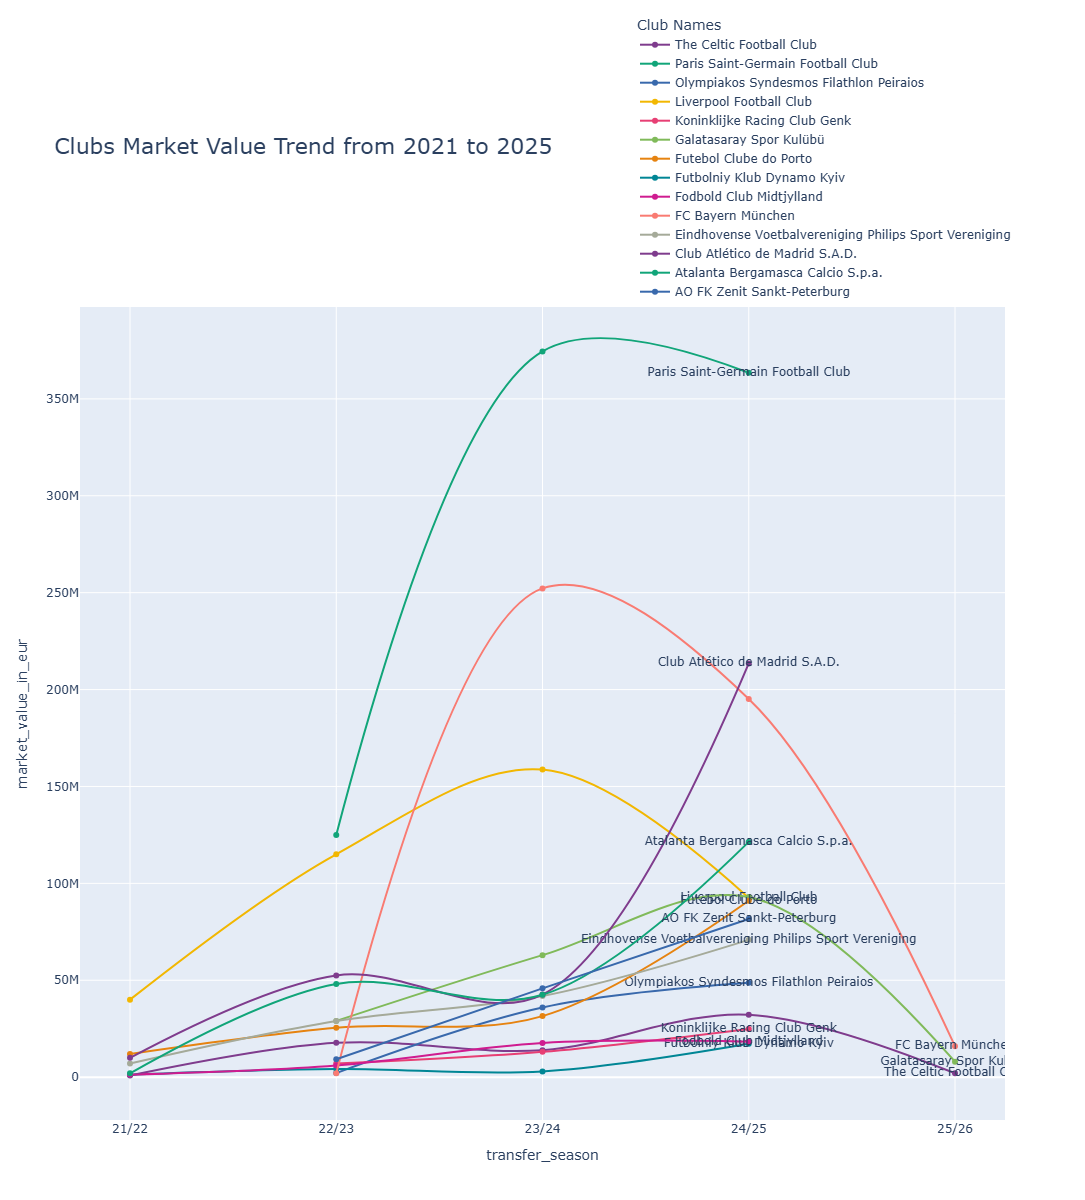

In [150]:

fig=px.line(club_val,
            x='transfer_season',
            y='market_value_in_eur',
            color='name',
            markers=True,
           line_shape='spline',
           text='name',
           hover_data=['name','competition_code'],
           color_discrete_sequence=px.colors.qualitative.Bold)
for trace in fig.data:
    trace.text = [trace.name if i == len(trace.x) - 1 else "" for i in range(len(trace.x))]



fig.update_layout(height=1200,
                  width=1100,
                 legend=dict(
        x=0.6,  
        y=1.0, 
        xanchor='left',
        yanchor='bottom'),
                  legend_title="Club Names",
                  title=dict(text="Clubs Market Value Trend from 2021 to 2025",
                             font=dict(size=22)
                            )
                  
                 )

fig.show()
            
            
            

## Insights:
- ### Paris Saint-Germain (PSG) has experienced a notable increase in its market value from 2021 to 2024.
- ### In 2024, the club's enterprise value reached nearly €3.5 billion, marking an approximate 22% rise from the previous year. 


# 10.Factors affecting players market_value to become higher:

In [51]:
players.dropna(inplace=True)
filter10=players[players['last_season'].isin([2018,2019,2020,2021,2022,2023,2024])]
filter10=filter10.groupby('last_season').apply(lambda x: x.nlargest(3, 'highest_market_value_in_eur'))[['player_id','first_name','last_name',
                                                                                                        'name','player_code','country_of_birth', 
                                                            'city_of_birth','country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
                                                            'foot', 'height_in_cm','current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur']].reset_index() #.apply(lambda x:x).sort_values(by='highest_market_value_in_eur',ascending=False).head(3)
filter10['date_of_birth']=pd.to_datetime(filter10['date_of_birth'])
filter10['age']=2024-filter10['date_of_birth'].dt.year

In [52]:


fig = px.scatter(
    filter10,
    x='name',  # X-axis
    y='highest_market_value_in_eur',  # Y-axis
    size='age',  # Scatter point size based on age
    color='last_season',  # Color by grouped 'last_season'
    color_continuous_scale='viridis',  # Define a color scale
    title="Market Value vs Player Name with Age as Size",
    hover_data=[
    'market_value_in_eur',
    'last_season',
    'sub_position']
)

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='Player Name',
    yaxis_title='Market Value (€)',
    height=600,
    width=1100,
    title_font_size=18,
    legend_title="Last Season "
)

# Show the plot
fig.show()

# <center>11.Domestic Leagues-2024 Winning clubs sqaud_size and market_value :</center>

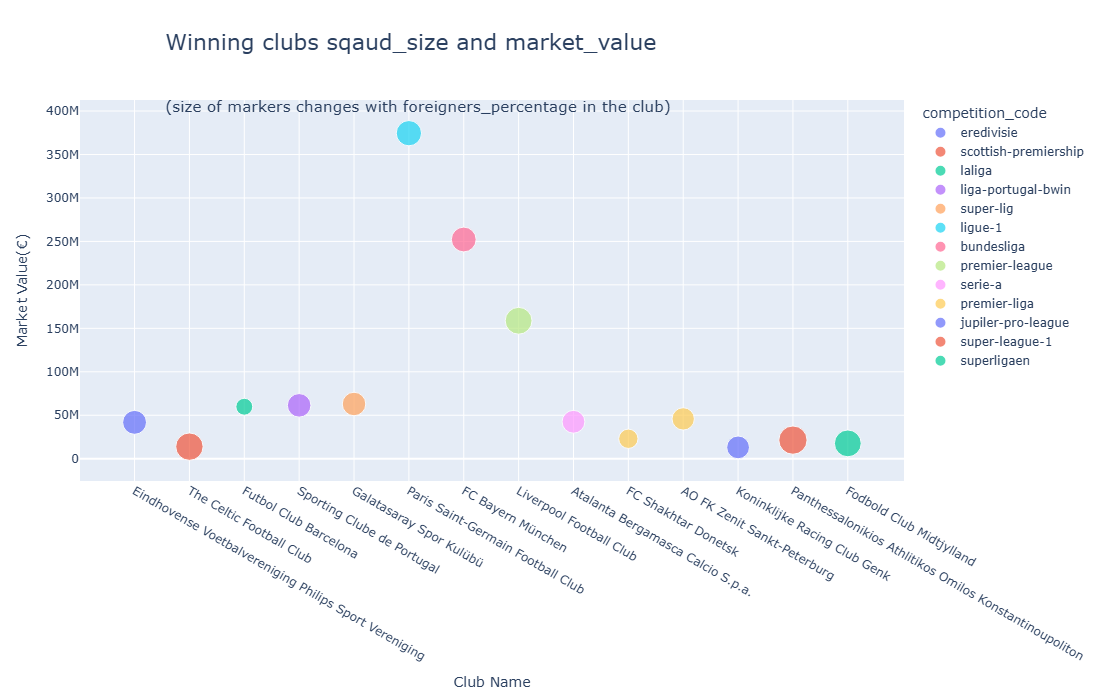

In [232]:
filter11=clubs_market_value.groupby(['transfer_season','to_club_id','name']).agg({'market_value_in_eur':'sum'}).reset_index()

filter11=filter11[filter11['transfer_season']=='23/24']
filter8['winner_club_id'] = pd.to_numeric(filter8['winner_club_id'], errors='coerce').fillna(0).astype(int)
filter11['to_club_id'] = pd.to_numeric(filter11['to_club_id'], errors='coerce').fillna(0).astype(int)

filter11=pd.merge(filter11,clubs,left_on='to_club_id',right_on='club_id',how='inner')
filter11=pd.merge(filter11,filter8,left_on='to_club_id',right_on='winner_club_id',how='right')

fig=px.scatter(filter11,
               x='name_x',
               y='market_value_in_eur',
               size='foreigners_percentage',
               color='competition_code',
               color_continuous_scale='cividis',
               hover_data=['squad_size']
               )
fig.update_layout(title=dict
                  (text="Winning clubs sqaud_size and market_value<br>"
                   "<br>"
              "<sub>(size of markers changes with foreigners_percentage in the club)</sub>",
                            font=dict(size=22),
                  xanchor='left',
                  x=0.15),
                 margin=dict(t=100),
                   height=700,
                  width=1100,
                 xaxis_title='Club Name',
                 yaxis_title='Market Value(€)'
                 )
               

fig.show()

## insights:

- ### "Paris Saint-Germain Football Club" with 212 million market value secured the 2023–24 Ligue 1 title, marking their 12th championship win ,having 64% foreign players.

- ### "FC Bayern Munchen" with 203.65 million market value secured the Bundesliga title ,having 61.5% players of their club are foreigners.

- ### 

# <center>12. Domestic legue BE1 2024 scoreboard</center>

- BE1 = "Belgium 1", representing the premier division of domestic football in Belgium.

In [ ]:
filter12=games[(games['competition_type']=='domestic_league') & (games['season']==2024)]
filter12=filter12.drop(columns=['url'])

filter12=filter12[filter12['competition_id']=='BE1'].groupby(['competition_id','round'],as_index=False).apply(lambda x:x).reset_index()
filter12.sort_values(by=['date','game_id'],ascending=[True,True],inplace=True)



In [ ]:
melted1=filter12.melt(id_vars=['game_id','competition_id','round','date'],value_vars=['home_club_name','away_club_name'],var_name='home/away',value_name='competitors')

melted2=filter12.melt(id_vars=['game_id','competition_id','round'],value_vars=['home_club_goals','away_club_goals'],value_name='goals')
filter12=pd.concat([melted1,melted2[['goals']]],axis=1)
#filter12=filter12.groupby(['game_id','competition_id','round'],as_index=True,group_keys=True).apply(lambda x:x)
#filter12
def assign_status(group):
    max_goals = group['goals'].max()
    min_goals = group['goals'].min()
    

    # Assign "Win," "Loss," or "Draw"
    group['status'] = group['goals'].apply(
        lambda x: "Draw" if max_goals == min_goals else ("Win" if x == max_goals else "Loss")
    
    )
    return group

# Apply status assignment
filter12 = filter12.groupby(['game_id', 'competition_id', 'round']).apply(assign_status)
filter12.reset_index(drop=True, inplace=True)

#create a status column showing 'won''lost' or 'draw' 
#create a points column give 3 points for win , 0 points for loss and 1 for draw
filter12["pts"]=np.where(
    filter12["status"]=='Draw',
    1,
    np.where(filter12["status"]=='Win',
             3,
             0)
)  


In [ ]:
filter12['date']=pd.to_datetime(filter12['date'])

filter12 = filter12.sort_values(by=['competitors', 'date',])

# Calculate the cumulative sum of points within each 'competitors' group
filter12["cumulative_points"] = filter12.groupby(['competitors'])['pts'].cumsum()

# If needed, reset the index to make the DataFrame tidy
filter12 = filter12.reset_index(drop=True)

In [ ]:
filter12['date']=pd.to_datetime(filter12['date'], errors='coerce')
filter12['month_year'] = filter12['date'].dt.strftime('%Y-%m')
filter12 = filter12[filter12['date'].notna()]

fig = px.bar(filter12, x='month_year', y='competitors', color='cumulative_points', 
              title="Jupiler Pro League 2024 scoreboard",
             orientation='h',
              labels={'cumulative_points': 'Cumulative Points', 'date': 'Date','game_id':'Game ID'},
            hover_data=['game_id'] )
fig.update_traces(text=filter12['cumulative_points'],  # Add the cumulative points as text
                  textposition='inside',  # Position the text inside the bars
                  textfont=dict(size=11, color='white'))  # Font size and color


fig.update_layout(height=800,
                  xaxis=dict(
        tickvals=[2000,2200,2400,2600,2800,3000],  # Custom tick values (cumulative points range)
        ticktext=['Jul-2024','Aug-2024','Sep-2024','Oct-2024','Nov-2024','Dec-2024'] ,   
                  
    ),
yaxis=dict(title="Clubs")
                 )

fig.show()

## Insights:
- #### Winner of Jupiler Pro League 2024 is "Koninkiljke Racing Club Genk" .
- #### Runner Up is "Club Brugge" .
- #### This is a Belgium based Football Game.
- #### "Club Brugge" , "RSC Anderlecht", "KRC Genk", and "Royal Antwerp FC" are some top Belgian Clubs.


# <center>13.English Premier League (EPL) 2024 Scoreboard:</center>

- GB1 stands for "Great Britain 1", representing the first division of domestic football in England.
- The English Premier League (EPL) is the top professional football league in England and one of the most popular and competitive football leagues in the world.
- 20 teams compete in the league each season .
- Each team plays 38 matches (home and away against every other team).
#### European Competitions:
- The top 4 teams qualify for the UEFA Champions League.
- The 5th-placed team and domestic cup winners may qualify for the UEFA Europa League or Europa Conference League.
#### Points System:
- Win: 3 points
- Draw: 1 point
- Loss: 0 points

In [ ]:
filter13=games[(games['competition_type']=='domestic_league') & (games['season']==2024)]
filter13=filter13.drop(columns=['url'])

filter13=filter13[filter13['competition_id']=='GB1'].groupby(['competition_id','round'],as_index=False).apply(lambda x:x).reset_index()

In [ ]:
melted1=filter13.melt(id_vars=['game_id','competition_id','round','date'],value_vars=['home_club_name','away_club_name'],var_name='home/away',value_name='competitors')

melted2=filter13.melt(id_vars=['game_id','competition_id','round'],value_vars=['home_club_goals','away_club_goals'],value_name='goals')
filter13=pd.concat([melted1,melted2[['goals']]],axis=1)

def assign_status(group):
    max_goals = group['goals'].max()
    min_goals = group['goals'].min()
    

    # Assign "Win," "Loss," or "Draw"
    group['status'] = group['goals'].apply(
        lambda x: "Draw" if max_goals == min_goals else ("Win" if x == max_goals else "Loss")
    
    )
    return group

filter13 = filter13.groupby(['game_id', 'competition_id', 'round']).apply(assign_status)
filter13.reset_index(drop=True, inplace=True)

filter13["pts"]=np.where(
    filter13["status"]=='Draw',
    1,
    np.where(filter13["status"]=='Win',
             3,
             0
            )
)
filter13['date']=pd.to_datetime(filter13['date'])
filter13 = filter13.sort_values(by=['competitors', 'date',])

filter13["cumulative_points"] = filter13.groupby(['competitors'])['pts'].cumsum()

filter13 = filter13.reset_index(drop=True)


In [ ]:
filter13['date']=pd.to_datetime(filter13['date'], errors='coerce')
filter13['month_year'] = filter13['date'].dt.strftime('%Y-%m')
filter13 = filter13[filter13['date'].notna()]

fig = px.bar(filter13, x='month_year', y='competitors', color='cumulative_points', 
              title="English Premier League (EPL) 2024 scoreboard",
             orientation='h',
              labels={'cumulative_points': 'Cumulative Points', 'date': 'Date','game_id':'Game ID'},
            hover_data=['game_id'] )
fig.update_traces(text=filter13['cumulative_points'],  # Add the cumulative points as text
                  textposition='inside',  # Position the text inside the bars
                  textfont=dict(size=11, color='white'))  # Font size and color


fig.update_layout(height=800,
                  xaxis=dict(
        tickvals=[2000,2200,2400,2600,2800,3000],  # Custom tick values (cumulative points range)
        ticktext=['Aug-2024','Sep-2024','Oct-2024','Nov-2024','Dec-2024'] ,   
                  
    ),
yaxis=dict(title="Clubs")
                 )

fig.show()

## EPL Insights:
- #### "Liverpool Football Club" is the winner of EPL 2024.
- #### "Nottingham Forest Football Club" is the runner up team.

# <center>14.Winners Trend List of "English Premier League"(2015-2024)</center>

In [ ]:
filter14=games[(games['competition_type']=='domestic_league') & (games['season'].isin([2015,2016,2017,2018,2019,2020,2021,2022,2023,2024]))]
filter14=filter14.drop(columns=['url'])

filter14=filter14[filter14['competition_id']=='GB1'].groupby(['competition_id','round'],as_index=False).apply(lambda x:x).reset_index()

In [ ]:
melted1=filter14.melt(id_vars=['season','game_id','competition_id','round','date'],value_vars=['home_club_name','away_club_name'],var_name='home/away',value_name='competitors')

melted2=filter14.melt(id_vars=['season','game_id','competition_id','round'],value_vars=['home_club_goals','away_club_goals'],value_name='goals')
filter14=pd.concat([melted1,melted2[['goals']]],axis=1)

def assign_status(group):
    max_goals = group['goals'].max()
    min_goals = group['goals'].min()
    

    # Assign "Win," "Loss," or "Draw"
    group['status'] = group['goals'].apply(
        lambda x: "Draw" if max_goals == min_goals else ("Win" if x == max_goals else "Loss")
    
    )
    return group

filter14 = filter14.groupby(['season','game_id', 'competition_id', 'round']).apply(assign_status)
filter14.reset_index(drop=True, inplace=True)

filter14["pts"]=np.where(
    filter14["status"]=='Draw',
    1,
    np.where(filter14["status"]=='Win',
             3,
             0
            )
)
filter14['date']=pd.to_datetime(filter14['date'])
filter14 = filter14.sort_values(by=['season','competitors', 'date',])

filter14["cumulative_points"] = filter14.groupby(['season','competitors'])['pts'].cumsum()

In [ ]:
top3 = (
    filter14.loc[filter14.groupby(['season','competitors'])['cumulative_points'].idxmax()]
    [['season', 'competitors', 'cumulative_points']]
)
top3 =top3.groupby('season',group_keys=False).apply(lambda x:x.nlargest(3,'cumulative_points'))[['season', 'competitors', 'cumulative_points']]
top3.reset_index(drop=True, inplace=True)
top3.sort_values(by='season',ascending=True,inplace=True)

In [ ]:

fig=px.bar(top3,
           x='cumulative_points',
           y='season',
           color='cumulative_points',
           orientation='h',
           title="English Premier League Winners Trend(2015-2024)",
              labels={'cumulative_points': 'Cumulative Points', 'date': 'Date'},
          color_continuous_scale=px.colors.sequential.Viridis
        )

fig.update_layout(
    
    height=800,
    width=1100,
    legend=dict(
        title="Clubs", 
        x=1, 
        y=1,  
        traceorder='normal',  
        orientation='v',  
        xanchor='right',  
        yanchor='bottom'  
    ),yaxis=dict(tickvals=top3['season'].unique(),  
        ticktext=top3['season'].unique()
                ),
    
 xaxis=dict(title='Total Points'),
        )

fig.update_traces(text=top3['competitors'],  
                  textposition='inside',  
                  textfont=dict(size=18, color='white'),
                 textangle=0) 

fig.show()
        

# <center>15. Players Appearance in English Premiur League:</center>

In [161]:

unique_dates = games.drop_duplicates(subset=['date'])[['date', 'season']].sort_values('date')
unique_dates['date']=pd.to_datetime(unique_dates['date'])
filter15=pd.merge(appearance,unique_dates,on='date',how='left')


In [163]:
filter15=filter15[(filter15['season']==2024) &(filter15['competition_id']=='GB1')]
filter15=filter15.groupby('player_id').agg({'player_name':'first',
                                            'goals':sum,
                                            'assists':sum,
                                            'yellow_cards':sum,
                                            'red_cards':sum,
                                            'minutes_played':sum,
                                           'player_club_id':'first',
                                           'player_current_club_id':'first'}).sort_values(by=['goals','assists','yellow_cards','red_cards'],ascending=[False,False,True,True]).reset_index()


In [165]:
unique_club_names=clubs[['club_id','name']]
filter15=pd.merge(filter15,unique_club_names,left_on='player_club_id',right_on='club_id',how='left')
filter15.rename(columns={'name':'player_club'},inplace=True)
filter15.drop('club_id',axis=1,inplace=True)
filter15=pd.merge(filter15,unique_club_names,left_on='player_current_club_id',right_on='club_id',how='left')
filter15.rename(columns={'name':'player_current_club'},inplace=True)
filter15.drop('club_id',axis=1,inplace=True)

unique_players=players[['player_id','country_of_birth','market_value_in_eur',
       'highest_market_value_in_eur','sub_position','foot', 'height_in_cm']]
filter15=pd.merge(filter15,unique_players,on='player_id',how='left')
filter15.loc[(filter15['player_name'] == 'Mohamed Salah') & (filter15['market_value_in_eur'].isna()), 'market_value_in_eur'] = 55000000.0
filter15.loc[(filter15['player_name'] == 'Mohamed Salah') & (filter15['highest_market_value_in_eur'].isna()), 'highest_market_value_in_eur'] = 150000000.0
filter15.loc[(filter15['player_name'] == 'Jhon Durán') & (filter15['market_value_in_eur'].isna()), 'market_value_in_eur'] = 40000000.0
filter15.loc[(filter15['player_name'] == 'Jhon Durán') & (filter15['highest_market_value_in_eur'].isna()), 'highest_market_value_in_eur'] = 40000000.0
filter15.loc[(filter15['player_name'] == 'Dominic Solanke') & (filter15['market_value_in_eur'].isna()), 'market_value_in_eur'] = 45000000.0
filter15.loc[(filter15['player_name'] == 'Dominic Solanke') & (filter15['highest_market_value_in_eur'].isna()), 'highest_market_value_in_eur'] = 45000000.0

In [167]:
Highest_goals=filter15.head(20)
Highest_goals.head()


,player_id,player_name,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,player_current_club_id,player_club,player_current_club,country_of_birth,market_value_in_eur,highest_market_value_in_eur,sub_position,foot,height_in_cm
0,148455,Mohamed Salah,17,13,1,0,1587,31,31,Liverpool Football Club,Liverpool Football Club,NaN,55000000.0,150000000.0,NaN,NaN,NaN
1,418560,Erling Haaland,14,1,2,0,1710,281,281,Manchester City Football Club,Manchester City Football Club,England,200000000.0,200000000.0,Centre-Forward,left,195.0
2,568177,Cole Palmer,12,6,3,0,1662,631,631,Chelsea Football Club,Chelsea Football Club,England,130000000.0,130000000.0,Attacking Midfield,left,185.0
3,349066,Alexander Isak,12,4,0,0,1383,762,762,Newcastle United Football Club,Newcastle United Football Club,Sweden,75000000.0,75000000.0,Centre-Forward,right,192.0
4,108725,Chris Wood,11,1,1,0,1498,703,703,Nottingham Forest Football Club,Nottingham Forest Football Club,New Zealand,7000000.0,18000000.0,Centre-Forward,right,191.0


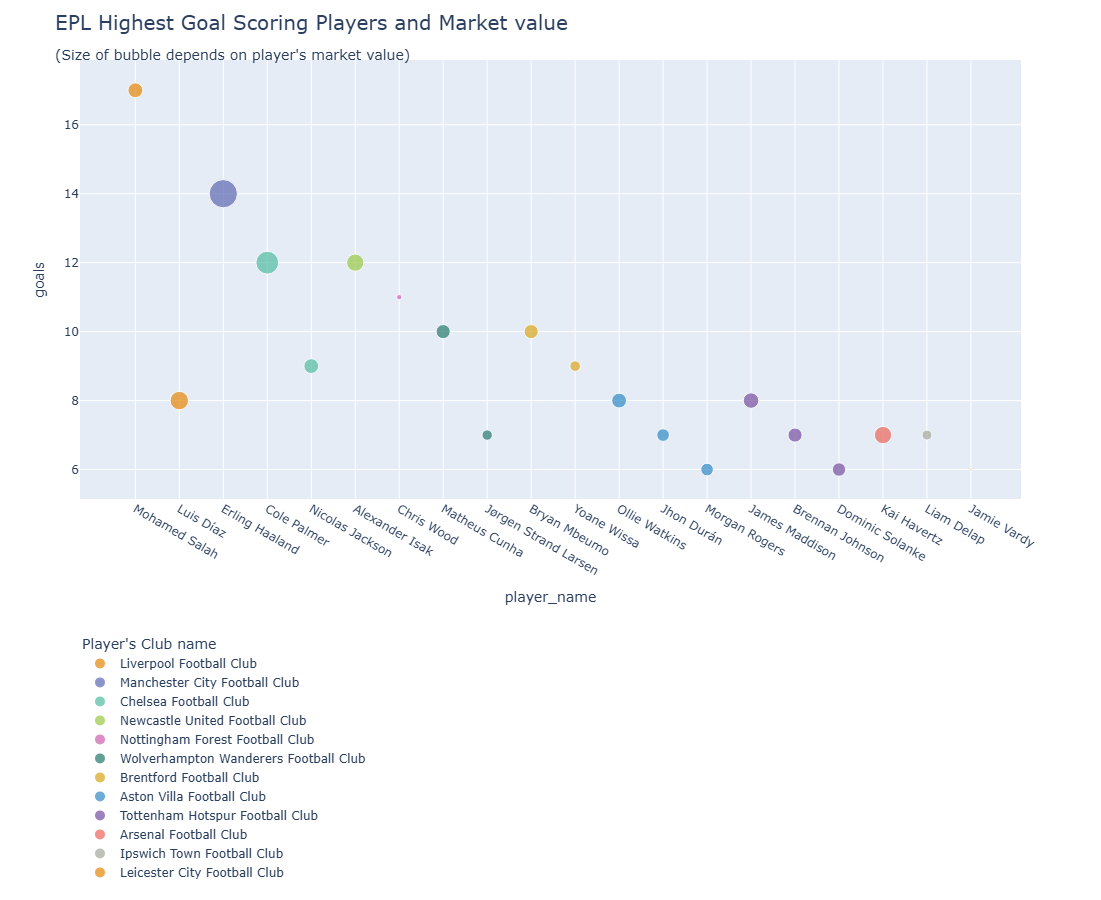

In [169]:
fig=px.scatter(Highest_goals,
               x='player_name',
               y='goals',
               color='player_club',
               size='market_value_in_eur',
               color_discrete_sequence=px.colors.qualitative.Vivid,
              hover_data=['highest_market_value_in_eur','country_of_birth','sub_position'])
fig.update_layout(height=900,
                  legend=dict(
        x=0,  
        y=-0.3, 
        xanchor='left',
        yanchor='top'
    ),
                 title="EPL Highest Goal Scoring Players and Market value<br>"
                 "<sub>(Size of bubble depends on player's market value)</sub>",
                  title_font_size=20,
                  legend_title="Player's Club name" 
                 )
fig.show()
               
               
               

# Factors and their impact on Market Value
- Goal Contributions (Goals + Assists):	More goals/assists = higher value
- 
- Age & Potential:	Young players have higher long-term value
- 
- Playing Position:	Forwards & attacking midfielders valued highest
- 
- Club Reputation:	Big clubs boost market value
- 
- Minutes Played:	Regular game time maintains value
- 
- Injuries & Consistency:	Frequent injuries reduce market value

## 1️⃣ Goal-Scoring & Assists Impact Market Value Significantly
- #### Erling Haaland (€200M) has 14 goals, 1 assist, the highest value in the dataset.
- #### Mohamed Salah (€55M, past €150M) has 17 goals, 13 assists, showing that while goals matter, other factors like age and contract length can cause a decline in market value.
- #### Cole Palmer (€130M) with 12 goals, 6 assists has an extremely high value, likely due to his young age and potential.
## 📌 Conclusion
#### ➡️ Players with high goal contributions (goals + assists) typically have higher market values.

## 2️⃣ Age & Potential Influence Market Value
- #### Haaland (€200M, 23 years old) & Palmer (€130M, 21 years old) have high values because of their young age & future potential.
- #### Salah (€55M, 31 years old) has a declining market value despite strong performances, mainly due to his age and shorter contract length.
- #### Chris Wood (€7M, 32 years old) has a low market value, showing that older players experience a market drop-off.
## 📌 Conclusion
#### ➡️ Young, high-potential players are valued higher than aging players, even if older players perform well.

## 3️⃣ Position Matters – Centre-Forwards Are Highly Valued
- #### Haaland (€200M), Isak (€75M), and Wood (€7M) are Centre-Forwards (CFs), yet their values vary.
- #### Haaland (CF, €200M) and Isak (CF, €75M) are in their prime, while Wood (CF, €7M, older) has declined.
- #### Palmer (€130M) plays Attacking Midfield, showing midfielders with strong attacking output also hold high value.
## 📌 Conclusion
#### ➡️ Strikers and attacking midfielders tend to have higher market values, but their age & consistency play a role.

## 4️⃣ Club Reputation Affects Market Value
- #### Haaland (€200M) at Manchester City and Palmer (€130M) at Chelsea have higher values partly due to their clubs' financial power & brand reputation.
- #### Chris Wood (€7M) at Nottingham Forest has a lower value because of his club’s smaller global presence.
## 📌 Conclusion
#### ➡️ Players at elite clubs (Man City, Liverpool, Chelsea) hold higher market values due to their clubs' financial strength & global reputation.

## 5️⃣ Playing Time (Minutes Played) Reflects Value Stability
- #### Haaland (1710 min), Salah (1587 min), Palmer (1662 min), Wood (1498 min) → Their market values remain stable due to regular game time.
- #### Isak (1383 min, €75M) has played fewer minutes, yet his market value is still high due to his potential & club.
## 📌 Conclusion
#### ➡️ Players who consistently play maintain higher market values.

# <center>16.Yellow Card and Red card Players</center>

In [176]:
filter16=filter15.sort_values(by=['yellow_cards','red_cards'],ascending=[False,False])
filter16.head(5)[['player_name','yellow_cards',
       'red_cards','goals','sub_position','player_club','market_value_in_eur']]

,player_name,yellow_cards,red_cards,goals,sub_position,player_club,market_value_in_eur
139,Marc Cucurella,8,0,1,NaN,Chelsea Football Club,NaN
190,Flynn Downes,7,0,1,Defensive Midfield,Southampton Football Club,15000000.0
201,Will Hughes,7,0,0,Central Midfield,Crystal Palace Football Club,9000000.0
252,Saša Lukić,7,0,0,NaN,Fulham Football Club,NaN
479,Boubakary Soumaré,7,0,0,NaN,Leicester City Football Club,NaN


# <center>17.Football leagues around the world</center>

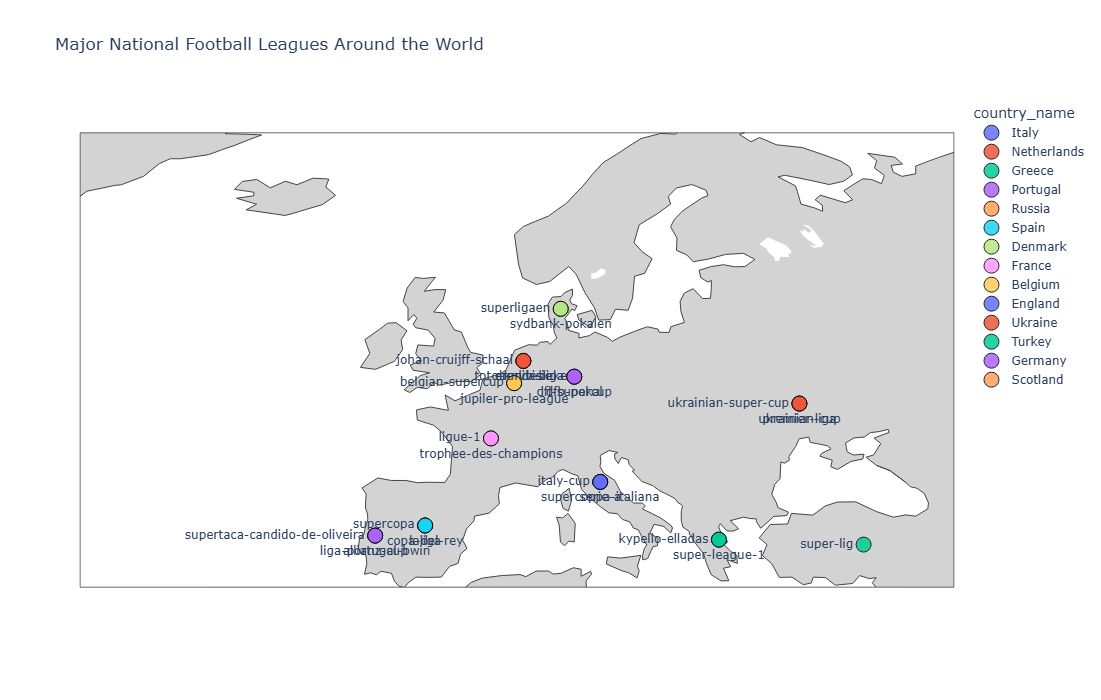

In [179]:
fig = px.scatter_geo(competitions,
                     locations="country_name",
                     locationmode="country names",
                     color="country_name",
                     
                     hover_data=['country_name','competition_code','competition_id'],	
                     title="Major National Football Leagues Around the World",
                     text='competition_code',
                     size_max=20                    
                     )
fig.update_layout(
    height=700, 
    width=1100, 
    geo=dict(
         
        showland=True,  
        landcolor="lightgray"     
    )
)
text_positions = np.random.choice(
    ['top center', 'bottom center', 'middle left', 'middle right'],
    size=len(competitions),
    replace=True
)
fig.update_traces(
    marker=dict(opacity=0.85,size=15, line=dict(width=1, color="black")), 
    textposition=text_positions,
    
)
fig.update_geos(

    center={"lat": 52.3676, "lon": 4.9041},  #centered on netherlands
    projection_type="natural earth",
    projection_scale=5
)

fig.show()